# Machine Learning - TP3

Dans ce troisième TP, vous allez utiliser la librairie [Scikit-learn]() ainsi que les algorithmes vus en cours pour résoudre différents problèmes. Les compétences du précédent TP (EDA, nettoyage et encodage des données) seront à nouveau nécessaires !

Une grande marque d'hypermarchés souhaite analyser les *patterns* d'achats de ses clients, et regrouper les clients selon leurs habitudes. L'objectif est, à terme, de faire des campagnes marketings ciblées pour chacun de ces groupes. Pour l'instant, on ne sait même pas quels groupes de clients existent (c'est-à-dire quelles habitudes).

<details>
<summary>Description des colonnes</summary>

| Colonne | Description |
|---------|-------------|
| ID | Customer's unique identifier |
| Year_Birth | Customer's birth year |
| Education | Customer's education level |
| Marital_Status | Customer's marital status |
| Income | Customer's yearly household income |
| Kidhome | Number of children in customer's household |
| Teenhome | Number of teenagers in customer's household |
| Dt_Customer | Date of customer's enrollment with the company |
| Recency | Number of days since customer's last purchase |
| Complain | 1 if the customer complained in the last 2 years, 0 otherwise |
| MntWines | Amount spent on wine in last 2 years |
| MntFruits | Amount spent on fruits in last 2 years |
| MntMeatProducts | Amount spent on meat in last 2 years |
| MntFishProducts | Amount spent on fish in last 2 years |
| MntSweetProducts | Amount spent on sweets in last 2 years |
| MntGoldProds | Amount spent on gold in last 2 years |
| NumDealsPurchases | Number of purchases made with a discount |
| AcceptedCmp1 | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| AcceptedCmp2 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp3 | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4 | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5 | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| Response | 1 if customer accepted the offer in the last campaign, 0 otherwise |
| NumWebPurchases | Number of purchases made through the company’s website |
| NumCatalogPurchases | Number of purchases made using a catalogue |
| NumStorePurchases | Number of purchases made directly in stores |
| NumWebVisitsMonth | Number of visits to company’s website in the last month |

</details>

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Exercice 1 : Clustering de personnalités de clients

Pour répondre au problème posé, nous allons faire du *clustering* pour identifier ces habitudes et regrouper les clients par *clusters*.

Q1. Chargez les données du fichier `marketing_campaign.csv` dans un DataFrame `df_customers`.

In [476]:
df_customers = pd.read_csv('marketing_campaign.csv', sep='	') # special char
df_customers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [477]:
df_customers.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Q2. Où sont les données manquantes ? Ne les supprimez pas pour l'instant.

In [478]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Q3. Faites une EDA rapide (distribution des données, univariée, textuelle ou graphique, comme vous préférez).

<Axes: >

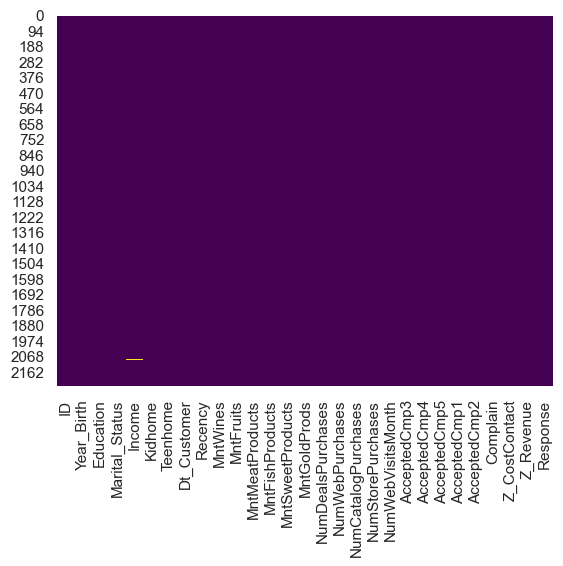

In [479]:
sns.heatmap(df_customers.isnull(), cbar=False, cmap='viridis')

In [480]:
df_customers.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Nous allons maintenant faire du *feature engineering* pour simplifier le jeu de données. Cela permettra d'orienter le clustering vers la réponse que l'on veut à la tâche.

Par exemple, si l'on veut regrouper les clients par habitudes de consommation, il peut être intéressant de conserver les données sur le nombre d'achats de viande, de poisson, de vins, etc. En revanche, si l'on veut regrouper les clients par dépenses totales, on peut remplacer ces colonnes par leur somme.

Ce *feature engineering* dépend surtout des décideurs et de ce dont ils ont besoin. Dans la pratique, on essaie souvent plusieurs façons de retravailler les *features* avant de trouver une façon qui donne une réponse intéressante...

In [481]:
# On va travailler sur une copie du DataFrame pour garder les données originales intactes, au cas où.
df_customers2 = df_customers.copy()

Q3. Construisez une nouvelle colonne `"Age"` à partir de `"Year_Birth"` dans `df_customers2`.

Note : le jeu de données a été collecté en 2014.

In [482]:
df_customers2["Age"] = 2014 - df_customers2["Year_Birth"]
df_customers2["Age"].head()

0    57
1    60
2    49
3    30
4    33
Name: Age, dtype: int64

Q4. Encodez la colonne `'Education'`. Quel encodage vous semble approprié ?

In [483]:
print(df_customers2["Education"].unique())
education_map = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}
df_customers2["Education"] = df_customers2["Education"].map(education_map)
df_customers2["Education"].head()

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


0    3
1    3
2    3
3    3
4    5
Name: Education, dtype: int64

Q5. Encodez la colonne `Marital_Status`. Pour simplifier les données et limiter le nombre de catégories, on ne voudra retenir que 2 catégories :

- les gens en couple, qu'ils soient marriés ou non ;
- les gens vivant seuls, qu'ils soient célibataires, divorcés, veufs.

Il existe des données rares et qui risquent de faire chuter la performance, vous pouvez les supprimer ou les regrouper dans la catégorie qui vous semble la plus pertinente.

In [484]:
print(df_customers["Marital_Status"].value_counts())
marital_map = {
    'Single': 1,
    'Married': 2,
    'Together': 2,
    'Divorced': 1,
    'Widow': 1,
    'Alone': 1,
    'Absurd': 1,
    'YOLO': 1
}
# soit on est en married = 1, sinon 0
df_customers2["Marital_Status"] = df_customers["Marital_Status"].apply(lambda x : 1 if x in ('Married', 'Together') else 0)
df_customers2["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Marital_Status
1    1444
0     796
Name: count, dtype: int64

Q6. Construisez une nouvelle colonne `"Children"` qui correspond à la somme des enfants (`Kidhome`) et adolescents (`Teenhome`).

In [485]:
df_customers2["Children"] = df_customers2["Kidhome"] + df_customers2["Teenhome"]

Q7. Construisez une nouvelle colonne `"Seniority"` qui correspond au nombre de mois écoulés depuis l'inscription du client (`"Dt_Customer"`).

On vous précise ci-dessous une variable `last_date` qui correspond à la date par rapport à laquelle faire la différence (temps écoulé), c'est-à-dire fin 2014.

Vous devriez d'abord convertir la colonne en `datetime` via [`pd.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) : lisez bien la documentation concernant le format des données.
Les objets de type `datetime` permettent des manipulations temporelles simplifiées (par rapport à si on manipulait "juste" des ints) : on peut demander le nombre de jours, le nombre de secondes, etc.

<details>
<summary>Astuce</summary>

Vous pouvez utiliser `s.dt.date` (avec `s` un objet de type `Series`, c'est-à-dire une colonne du DataFrame) pour faire des traitements sur les dates.

La méthode [`s.dt.date.apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) sera utile pour appliquer une transformation (fonction) à chacun des éléments de la colonne.

Puis vous pourrez utiliser `s.dt.days` pour récupérer le résultat sous forme de jours. Il ne restera plus qu'à le transformer en mois !
</details>

In [486]:
from datetime import date, datetime

last_date = date(2014, 12, 31)

In [487]:
# df_customers2["Seniority"] = (last_date - pd.to_datetime(df_customers2["Dt_Customer"], format='%d-%m-%Y'))
df_customers["Dt_Customer"].head()
dates = pd.to_datetime(df_customers2["Dt_Customer"], dayfirst=True)
# df_customers2["Seniority"] = dates.apply(lambda x : (last_date.month - x.month) + 12 * (last_date.year - x.year))

df_customers2["Seniority"] = (dates.dt.date.apply(lambda x : (last_date - x).days)/30).round().astype(int)

df_customers2["Seniority"].head()
# df_customers2["Seniority"] = df_customers["Dt_Customer"].apply(lambda x : (last_date - datetime(x, format='%d-%m-%Y')).days)

0    28
1    10
2    17
3    11
4    12
Name: Seniority, dtype: int64

Q8. Construisez la colonne `"AcceptedOffers"`, qui correspond à la somme des offres acceptées (`"AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"`).

In [488]:
df_customers2["AcceptedOffers"] = df_customers2["AcceptedCmp1"] + df_customers2["AcceptedCmp2"] + df_customers2["AcceptedCmp3"] + df_customers2["AcceptedCmp4"] + df_customers2["AcceptedCmp5"]
df_customers2["AcceptedOffers"].value_counts()

AcceptedOffers
0    1777
1     325
2      83
3      44
4      11
Name: count, dtype: int64

Q9. Construisez une nouvelle colonne `"Expenses"`, qui correspond à la somme des dépenses pour tous les types de produits (`"MntWines", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"`).

Note : ici, on pourrait vouloir avoir une granularité plus fine et conserver ces colonnes, si on voulait catégoriser les clients selon qu'ils achètent plutôt de la viande, plutôt du vin, ... Cette simplification que je propose est **une** façon de faire, ce n'est pas la seule ni forcément la meilleure ! (Elle a l'avantage de diminuer le nombre de *features* pour l'interprétation donc de raccourcir le temps nécessaire pour ce TP...)

<Axes: ylabel='Frequency'>

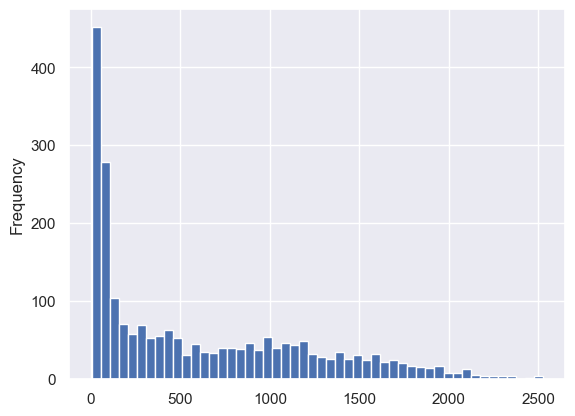

In [489]:
df_customers2["Expenses"] = df_customers2["MntWines"] + df_customers2["MntFruits"] + df_customers2["MntMeatProducts"] + df_customers2["MntFishProducts"] + df_customers2["MntSweetProducts"] + df_customers2["MntGoldProds"]
df_customers2["Expenses"].plot(kind='hist', bins=50)

Q10. Construisez une nouvelle colonne `"AllNumberPurchases"`, qui correspond à la somme du nombre d'achats, quelle que soit l'origine de ces achats (Web : `"NumWebPurchases"`, catalogue : `"NumCatalogPurchases"`, en magasin : `"NumStorePurchases"`, par offre promotionnelle : `"NumDealsPurchases"`).

Note : là encore, il s'agit d'**une** façon de faire...

<Axes: ylabel='Frequency'>

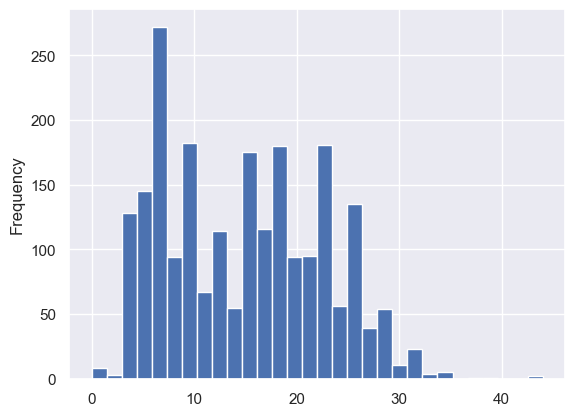

In [490]:
df_customers2["AllNumberPurchases"] = df_customers["NumDealsPurchases"] + df_customers["NumWebPurchases"] + df_customers["NumCatalogPurchases"] + df_customers["NumStorePurchases"]
df_customers2["AllNumberPurchases"].plot(kind='hist', bins=30)

Q11. Supprimez les colonnes inutiles ou que nous avons utilisé pour construire d'autres colonnes.

Au final, nous voulons garder : `Age, Education, Marital_Status, Income, Children, Seniority, Recency, Complain, Expenses, AcceptedOffers, NumWebVisitsMonth, All_NumPurchases`

C'est-à-dire que nous devons supprimer : `ID, Year_Birth, Kidhome, Teenhome, Dt_Customer, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCm4, AcceptedCmp4, AcceptedCmp5, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, Z_CostContact, Z_Revenue, Response`

In [491]:
print(df_customers2.columns)
df_customers_cleaned = df_customers2[["Age", "Education", "Marital_Status", "Income", "Children", "Seniority", "Recency", "Complain","Expenses", "AcceptedOffers", "AllNumberPurchases", "NumWebVisitsMonth"]].copy()
df_customers_cleaned.head()

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Children', 'Seniority', 'AcceptedOffers', 'Expenses',
       'AllNumberPurchases'],
      dtype='object')


,Age,Education,Marital_Status,Income,Children,Seniority,Recency,Complain,Expenses,AcceptedOffers,AllNumberPurchases,NumWebVisitsMonth
0,57,3,0,58138.0,0,28,58,0,1617,0,25,7
1,60,3,0,46344.0,2,10,38,0,27,0,6,5
2,49,3,1,71613.0,0,17,26,0,776,0,21,4
3,30,3,1,26646.0,1,11,26,0,53,0,8,6
4,33,5,1,58293.0,1,12,94,0,422,0,19,5


Q12. Il y a peu de données manquantes, et elles sont toutes dans la colonne `"Income"` : c'est une situation idéale pour essayer de les remplacer, plutôt que de les supprimer ! Imputez les valeurs manquantes de la colonne `"Income"` dans un DataFrame `df_customers3` en utilisant la médiane comme valeur de remplacement.

Étant donnée la distribution des données, c'est une solution un peu robuste (beaucoup plus que d'utiliser la moyenne !), mais qui peut vite montrer ses limites s'il existe des corrélations entre cette colonne et d'autres (qui ne seront pas capturées par une simple médiane).

Pour aller plus loin => vous trouverez un exercice bonus en fin de sujet sur l'utilisation de l'algorithme **MissForest**, se basant (comme son nom l'indique) sur les forêts aléatoires.

<details>
<summary>Astuce</summary>

Vous pourrez utiliser la méthode [`df.fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) pour remplir automatiquement les NA. Regardez bien les paramètres pour savoir comment configurer la valeur de remplacement.
</details>

In [492]:
income_med = df_customers_cleaned['Income'].median()
df_customers_cleaned['Income'] = df_customers_cleaned['Income'].fillna(income_med)

Q13. Nous allons maintenant normaliser les données dans un DataFrame `df_customers4`, afin d'entraîner ensuite un algorithme de clustering. KMeans, par exemple, est particulièrement sensible aux différentes échelles dans les données. Reprenez l'EDA, on se focalisant sur les données numériques qui ont une grande échelle (analyse univariée à nouveau), puis choisissez une méthode de normalisation pour chacune des colonnes.

On rappelle les méthodes de normalisation : min-max (linéaire), z-norm, log. Chacune de ces méthodes peut être avec ou sans *clipping*.

## Normalisation
---

In [493]:
df_customers4 = df_customers_cleaned.copy()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Marital_Status'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Seniority'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'Expenses'}>],
       [<Axes: title={'center': 'AcceptedOffers'}>,
        <Axes: title={'center': 'AllNumberPurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>]], dtype=object)

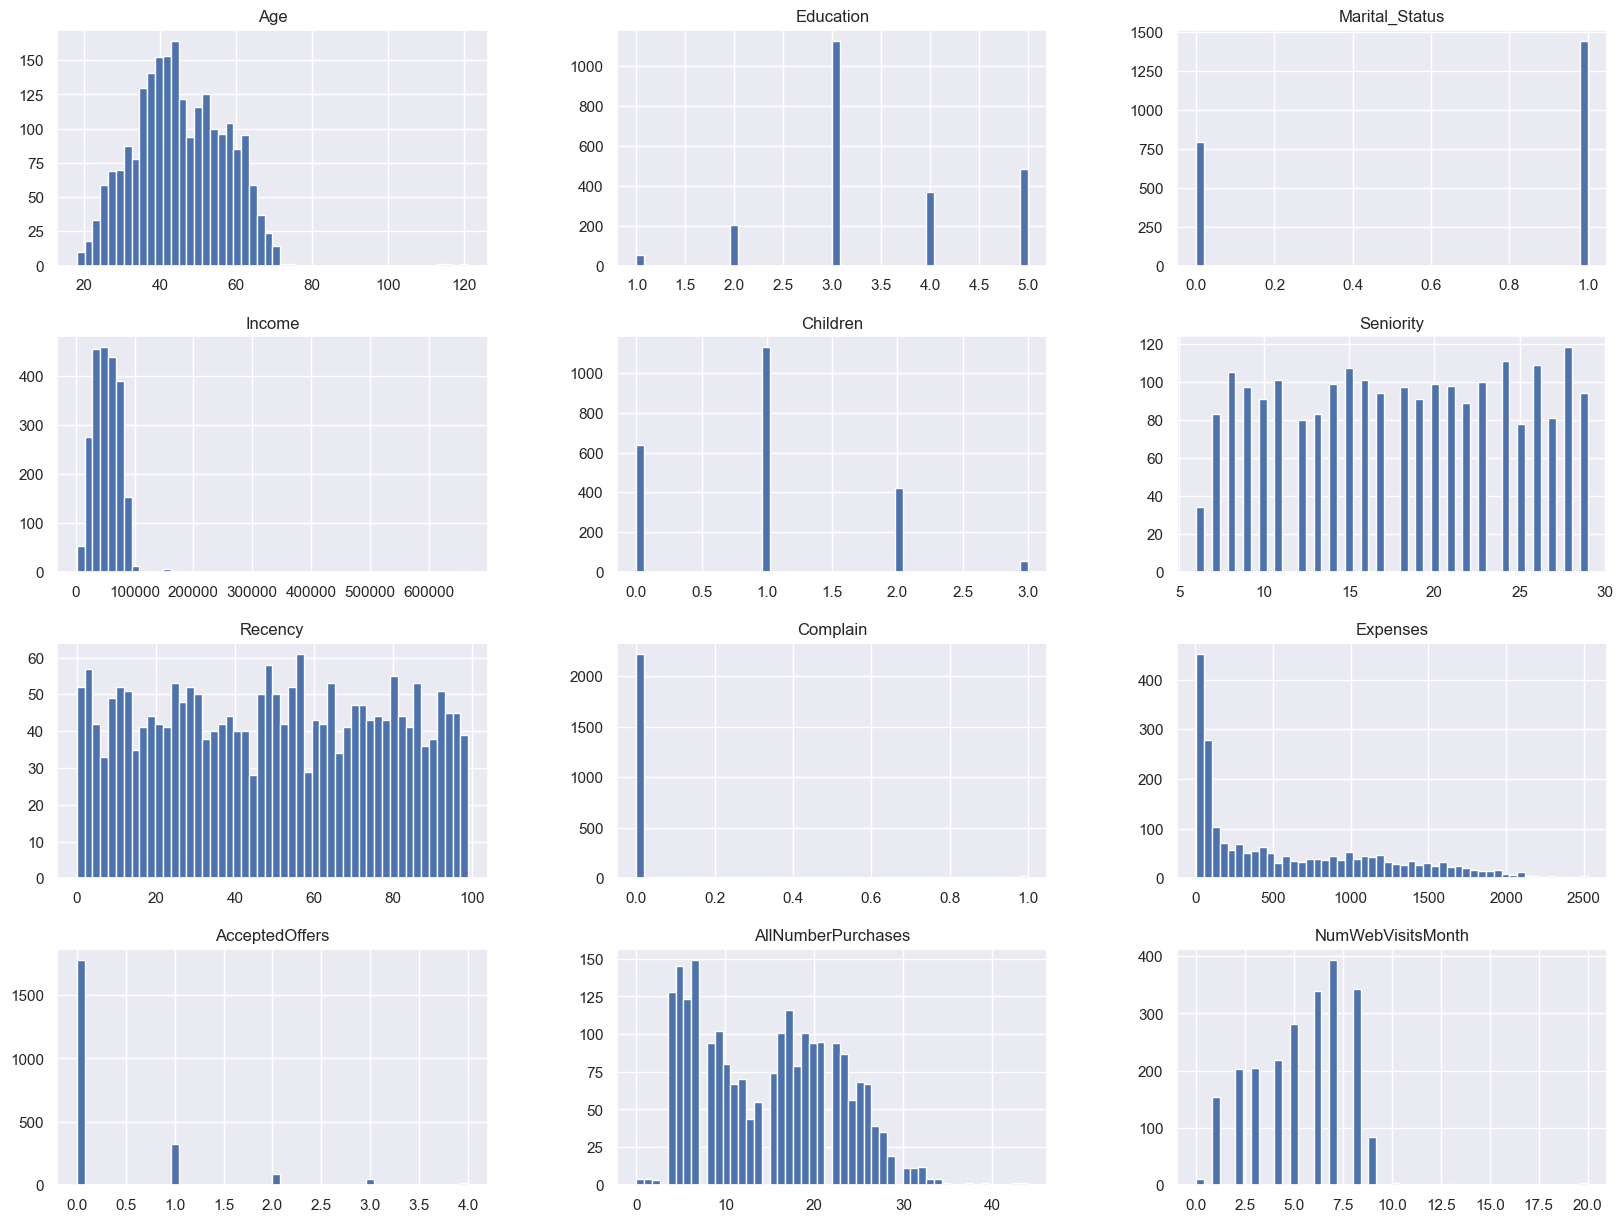

In [494]:
df_customers4.hist(bins=50, figsize=(20,15))

In [495]:
# clipping
df_customers4['Age'] = df_customers4['Age'].clip(10, 70)
df_customers4['Income'] = df_customers4['Income'].clip(0, 110000)
df_customers4['Expenses'] = df_customers4['Expenses'].clip(0, 2000)
df_customers4['NumWebVisitsMonth'] = df_customers4['NumWebVisitsMonth'].clip(0, 10)
df_customers4['AllNumberPurchases'] = df_customers4['AllNumberPurchases'].clip(5, 35)


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Marital_Status'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Seniority'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'Expenses'}>],
       [<Axes: title={'center': 'AcceptedOffers'}>,
        <Axes: title={'center': 'AllNumberPurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>]], dtype=object)

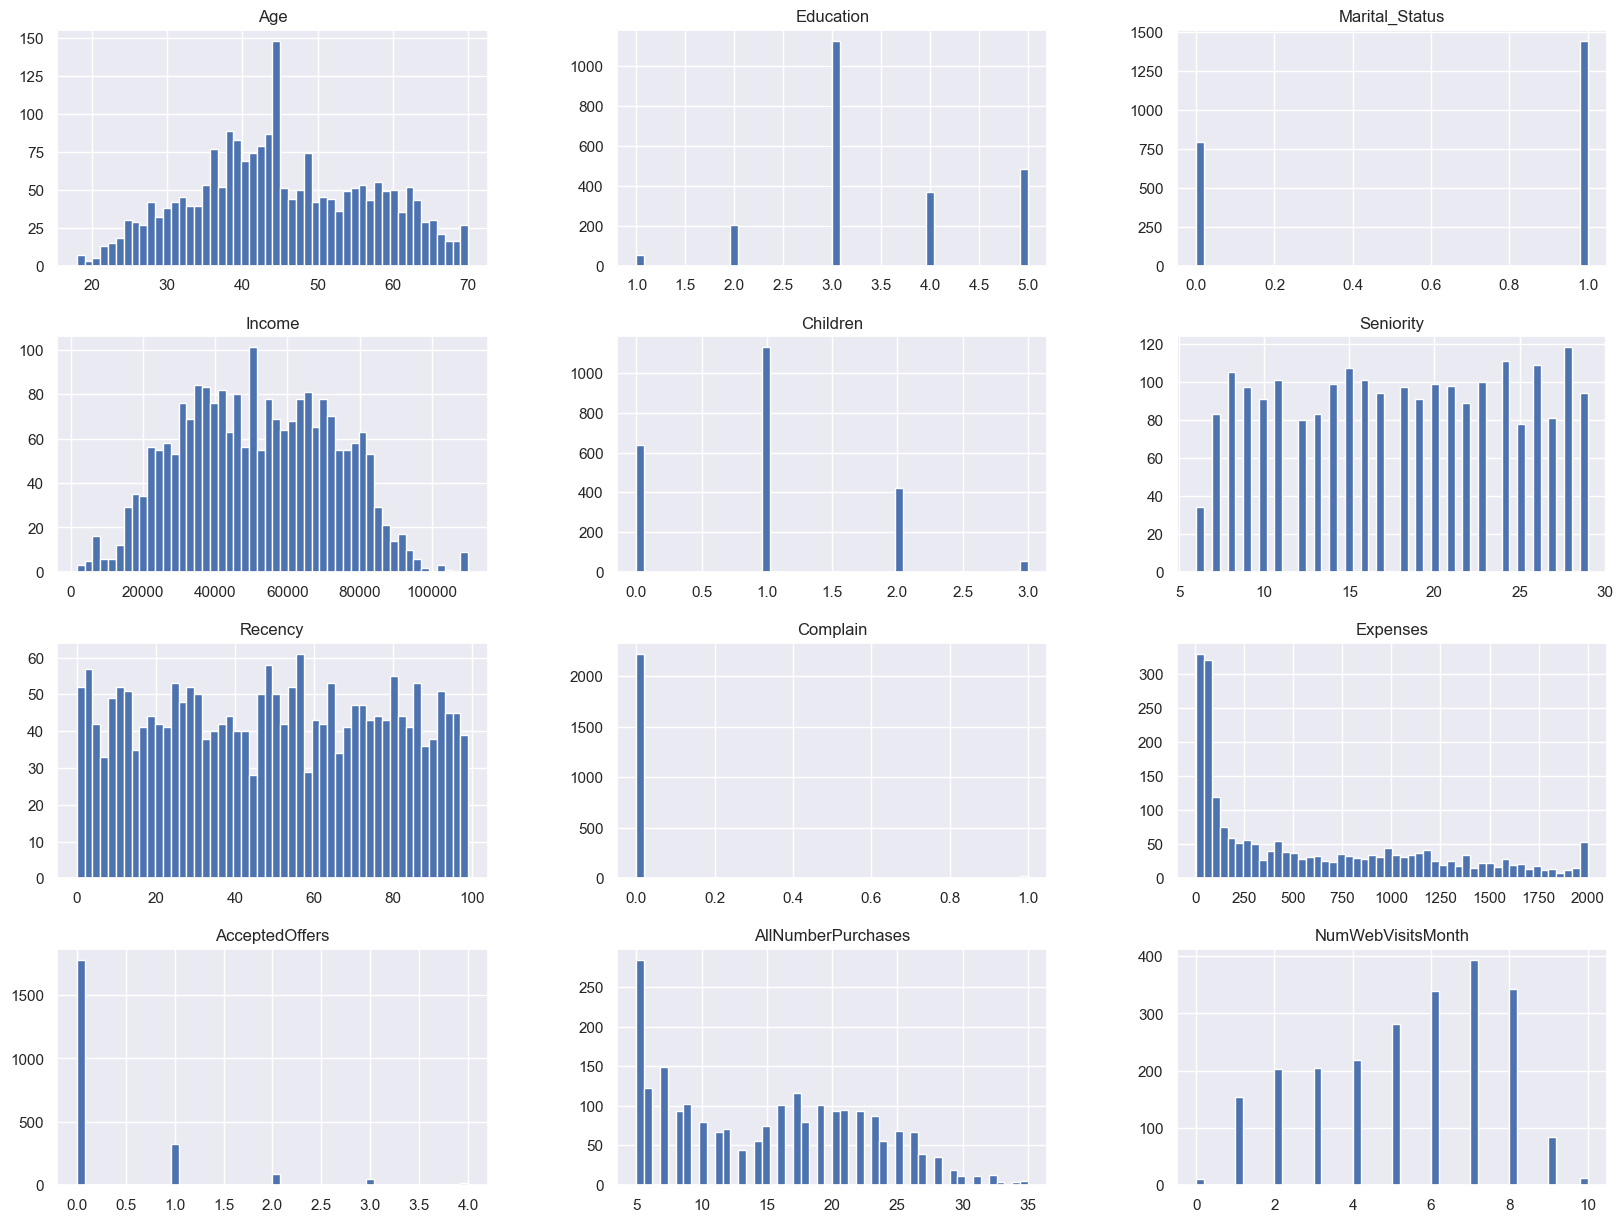

In [496]:
df_customers4.hist(bins=50, figsize=(20,15))


In [497]:
# Normalisation
df_customers4["Age"] = (df_customers4["Age"] - df_customers4["Age"].mean()) / df_customers4["Age"].std()
df_customers4["Recency"] = (df_customers4["Recency"] - df_customers4["Recency"].mean()) / df_customers4["Recency"].std()
df_customers4["AllNumberPurchases"] = (df_customers4["AllNumberPurchases"] - df_customers4["AllNumberPurchases"].mean()) / df_customers4["AllNumberPurchases"].std()
# df_customers4["NumWebVisitsMonth"] = (df_customers4["NumWebVisitsMonth"] - df_customers4["NumWebVisitsMonth"].mean()) / df_customers4["NumWebVisitsMonth"].std()
df_customers4["Income"] = (df_customers4["Income"] - df_customers4["Income"].mean()) / df_customers4["Income"].std()
df_customers4['Education'] = (df_customers4['Education'] - df_customers4['Education'].mean()) / df_customers4['Education'].std()

# min-max scaling
df_customers4["Seniority"] = (df_customers4["Seniority"] - df_customers4["Seniority"].min()) / (df_customers4["Seniority"].max() - df_customers4["Seniority"].min())
df_customers4["Recency"] = (df_customers4["Recency"] - df_customers4["Recency"].min()) / (df_customers4["Recency"].max() - df_customers4["Recency"].min())

# normalisation log
df_customers4["Expenses"] = np.log1p(df_customers4["Expenses"])


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Marital_Status'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Seniority'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'Expenses'}>],
       [<Axes: title={'center': 'AcceptedOffers'}>,
        <Axes: title={'center': 'AllNumberPurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>]], dtype=object)

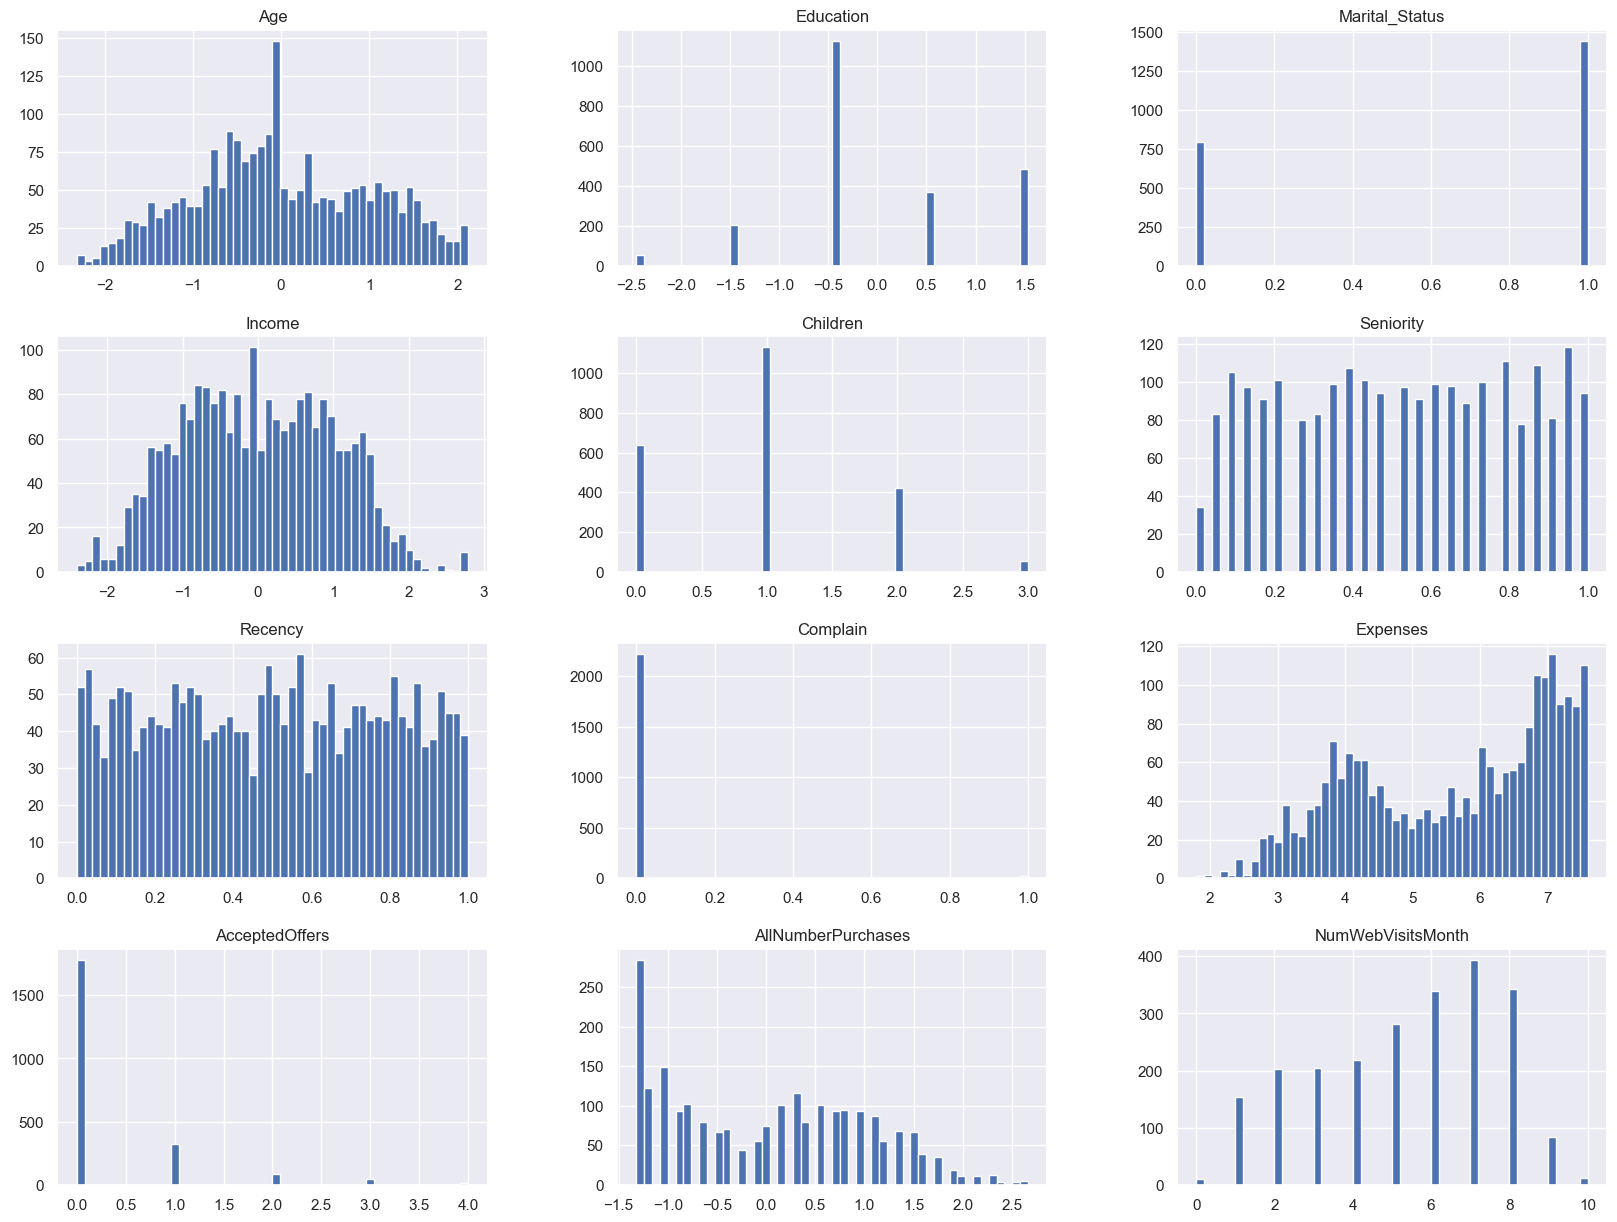

In [498]:
df_customers4.hist(bins=50, figsize=(20,15))

## K-Means

Q14. Nous allons maintenant effectuer un algorithme de clustering (KMeans) sur les données.

Nous n'avons aucune idée sur le nombre de clusters à apprendre ; nous allons donc devoir le déterminer empiriquement. On utilisera pour cela la méthode du coefficient de silhouette.

Créez un dictionnaire `results` dans lequel vos clés seront le nombre de clusters `k` et vos valeurs seront les modèles appris.
Puis, pour plusieurs `k` (à vous de choisir lesquels !), entraînez un modèle de KMeans et mémorisez les résultats (les modèles entraînés) dans le dictionnaire.

In [499]:
from sklearn.cluster import KMeans

results = {}
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_customers4)
    results[i] = kmeans

Q15. Calculez les coefficients de silhouette pour chacun des `k`, à partir des modèles KMeans (entraînés) correspondants. Affichez ensuite la courbe des coefficients de silhouette par rapport aux `k`.

Vous pourrez utiliser pour cela la fonction [`sklearn.metrics.silhouette_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

In [500]:
from sklearn.metrics import silhouette_score

coeff_silhouette = {}
for k in results.keys():
    score = silhouette_score(df_customers4, results[k].labels_)
    coeff_silhouette[k] = score

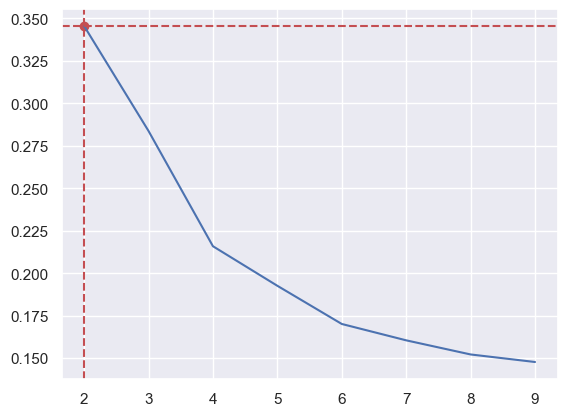

In [501]:
plt.plot(list(coeff_silhouette.keys()), list(coeff_silhouette.values()))

# silhouette score, on prend le max
k = max(coeff_silhouette, key=coeff_silhouette.get)
plt.scatter(k, coeff_silhouette[k], c='r')
plt.axvline(x=k, c='r', linestyle='--')
plt.axhline(y=coeff_silhouette[k], c='r', linestyle='--')

Q16. Quel est le nombre `k` optimal selon votre courbe ? Nous allons utiliser à partir de maintenant le modèle KMeans correspondant à cet hyperparamètre optimal.

Comment interpréter cette valeur par rapport au contexte du problème ? Rappel : on veut grouper les clients par rapport à leurs caractéristiques d'achats.

In [502]:
kmeans = results[k]

Q17. On veut visualiser quelles *features* sont les plus importantes pour le clustering.

Pour cela, commencez par apprendre un classifieur *RandomForest*, en considérant que les clusters sont des *labels*.
(Cela permet d'apprendre une relation entre les *features* et le cluster prédit)

In [515]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df_customers4, kmeans.labels_)

RandomForestClassifier(random_state=42)

Q18. Maintenant que nous disposons d'un classifieur entraîné, on veut calculer l'importance de chaque *feature*. Utilisez [`sklearn.inspection.permutation_importance()`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html) pour calculer ces importances à partir de la *Random Forest* (entraînée !), sur l'ensemble des données, puis visualisez-les graphiquement.

<details>
<summary>Astuce</summary>

Le calcul de l'importance par permutation effectue plusieurs permutations (pour chaque *feature*) ; on obtient donc une distribution (un tableau 2D) d'importances (des valeurs pour chaque *feature* et chaque répétition).
On veut visualiser à la fois la moyenne et l'écart-type des importances pour chaque *feature*, pour avoir une visualisation un peu plus fine que simplement la moyenne.
Utilisez maplotlib ou seaborn de manière à affichez un diagramme en bâtons (par exemple), avec affichage de l'écart-type (sous forme d'un paramètre souvent appelé "erreur d'estimation").
</details>

<BarContainer object of 12 artists>

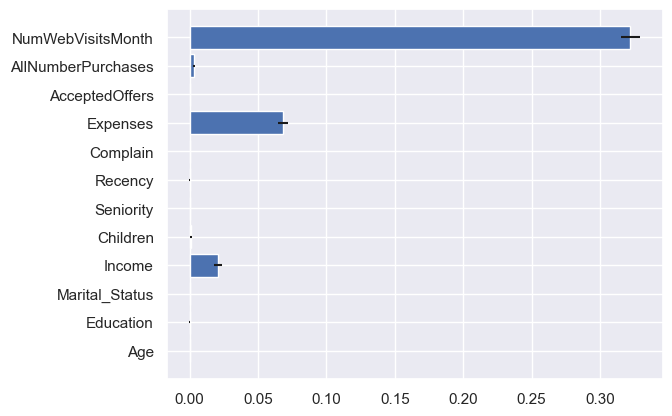

In [519]:
from os import error
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, df_customers4, kmeans.labels_, n_repeats=10, random_state=42)
plt.barh(df_customers4.columns, result.importances_mean, xerr=result.importances_std)

Q19. On veut maintenant visualiser les données des clients, en indiquant à quel cluster ils appartiennent (typiquement à travers la couleur de leur point).

Il faut donc réduire les données en 2D. Effectuez une PCA avec autant de composantes que les données de départ. Affichez ensuite le ratio de variance expliquée cumulé selon le nombre de composantes considérées.

Vous pourrez utiliser pour cela l'algorithme PCA implémenté dans Scikit-learn : [`sklearn.decomposition.PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

<details>
<summary>Rappel sur le fonctionnement d'une PCA</summary>

Pour rappel, dans une PCA, la 1ère composante est construite de manière à expliquer le plus de variance possible. Ensuite, on transforme les données de manière à ignorer cette composante, et on construit la 2ème composante qui explique le plus de variance (restante) possible. Etc.
Par construction, les composantes sont ordonnées par explication de variance décroissante : prendre la 1ère composante expliquera toujours plus de variance que prendre la 2e, etc.

On peut donc calculer la variance expliquée cumulée en prenant d'abord uniquement la 1ère, puis uniquement la 1ère et la 2ème, puis la 1ère, 2ème, 3ème, etc.

Naturellement, lorsqu'on garde 100% des composantes, on explique ... 100% de la variance.

Dans Sklearn, on peut obtenir le ratio de variance expliquée via un des attributs de l'objet [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (après entraînement)...
</details>

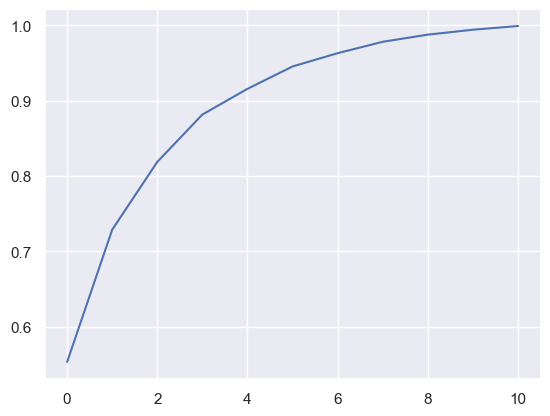

In [529]:
from sklearn.decomposition import PCA

ratios = []
for i in range(2, 12):
    pca = PCA(n_components=i)
    pca.fit(df_customers4)
    
plt.plot(np.cumsum(pca.explained_variance_ratio_))


Q20. D'après la courbe obtenue, 2 composantes expliquent-elles suffisamment de variance pour qu'il soit intéressant de visualiser les données ?

Affichez une visualisation en nuage de points (*scatter plot*) en ne retenant que les 2 ou 3 premières composantes (selon votre opinion sur la quantité de variance expliquée), et colorez les points selon leur cluster prédit par KMeans.

Cette visualisation permet de voir qu'il existe une frontière de décision linéaire entre les 2 clusters.

En revanche, il est difficile d'interpréter ces données, par rapport aux données d'origine, c'est-à-dire les caractéristiques des clients : la PCA construit une **nouvelle base**. Par exemple, que signifie "1ère composante > 0" ?

Si on veut interpréter les clusters (prédictions), par exemple savoir si le 1er groupe consomme plutôt de la viande, fait beaucoup d'achats, etc., nous avons 2 solutions :

- Interpréter la PCA en "décortiquant" la construction de la nouvelle base. Chaque composante est construite comme une combinaison linéaire des *features* d'origine, on peut donc "lire" la formule pour chaque composante. Par exemple, "1ère composante = 0.37 Income + 0.28 Expenses + 0.000000072 Age + (...)". Cela n'est possible que quand le nombre de *features* d'origine reste faible, ou que les poids de la combinaison linéaire sont négligeables pour de nombreuses *features*. Ici, on a 12 *features*, cela risque d'être compliqué.

- Visualiser les données d'origine. Contrairement à la PCA, ces données-là ne sont pas construites pour expliquer le plus de variance ! On ne peut donc pas se contenter de prendre uniquement les 2 ou 3 premières *features*. Pour interpréter correctement, il vaut mieux regarder la prédiction par rapport à la distribution des données sur chaque colonne. On peut aussi prendre les colonnes 2-à-2 (nuage de point ou *scatter plot*) pour voir s'il existe des relations entre les colonnes. Le calcul d'importance des *features* nous aide à choisir les colonnes sur lesquelles se concentrer : il est inutile de passer trop de temps à analyser visuellement la relation entre `"Complain"` et la prédiction, si en fait `"Complain"` n'était pas utile à la prédiction...

Q21. Analysez la relation entre les dépenses (`"Expenses"`), les revenus (`"Income"`), et la prédiction.

Attention : visualisez les données d'origines, pas les données normalisées ! Sinon, il sera plus difficile d'interpréter (que signifie un `"Income"` de -4 ?). En revanche, il peut être utile d'appliquer des *clippings* si les données sont illisibles car écrasées par des *outliers* très extrêmes.

Que pouvez-vous déduire de ce graphique ?

In [507]:
### Votre réponse ici

Q22. Analysez la relation entre le nombre d'enfants et la prédiction.

Peut-on déduire quelque chose de cette relation ?

In [508]:
### Votre réponse ici

Q23. Analysez la relation entre l'âge et la prédiction.

Que peut-on déduire de cette relation ?

In [509]:
### Votre réponse ici

Q24. Regroupez toutes les informations que vous avez déterminé sur les clusters 0 et 1. Quelle catégorie de population chacun de ces clusters représente ?

Concluez par rapport à la tâche initiale : connaissant les dépenses des clusters 0 et 1, quel(s) plan(s) d'actions l'entreprise peut-elle mettre en œuvre pour augmenter ses bénéfices ?

In [510]:
### Votre réponse ici

## Exercice bonus : imputation de données avec MissForest

Dans cet exercice bonus, nous allons essayer d'imputer les valeurs manquantes de la colonne `"Income"` de manière un peu plus intelligente qu'avec une simple médiane.

Nous allons utiliser l'algorithme [**MissForest**](https://pypi.org/project/MissForest/), qui se base sur les forêts aléatoires.

L'avantage d'un tel algorithme, par rapport à une méthode "fixe" comme la médiane ou la moyenne, est qu'il devrait être capable de détecter les relations entre les variables. Par exemple, supposons qu'il existe une relation entre le revenu (`Income`), et le nombre de produits en or achetés (`MntGoldPurchases`) (cette relation semble assez pertinente), la médiane donnerait le même revenu à tous les individus, peu importe le nombre de produits en or achetés : on risque de supposer que 2 personnes, l'une achetant en moyenne 1 produit en or, et l'autre 10, ont le même revenu !

Quand il existe peu de *features*, et qu'il existe une corrélation claire avec une donnée catégorielle, on peut faire d'abord un `groupby` par rapport à la variable catégorielle, puis imputer par la médiane **de chaque sous-groupe**. C'est déjà un peu plus intéressant que la médiane de l'ensemble des individus, mais ça demande à ce que beaucoup de conditions soient réunies... Dans tous les autre cas, c'est trop complexe à faire à la main, on demande à un algorithme de ML de résoudre le problème pour nous !

Les forêts aléatoires devraient normalement gérer les données catégorielles, mais leur implémentation ne le permet pas, par simplification... Heureusement, nous avons déjà transformé les données catégorielles  :-) (De toute façon, les KMeans non plus n'auraient pas permis d'utiliser des données catégorielles...)

Note : nous allons travailler sur les données **encodées** mais pas besoin qu'elles soient **normalisées**, car les forêts aléatoires sont assez robustes face aux données non-normalisées.

Il vous faudra installer les librairies `missforest` et `lightgbm` :

```sh
pip install missforest lightgbm tqdm
```

Attention ! **MissForest** n'est pas un algorithme parfait, cela reste un algorithme de ML, il est donc sujet au *Garbage In, Garbage Out* !
Pour vérifier que l'algorithme ne fait pas n'importe quoi, nous allons d'abord évaluer sa capacité à imputer des données. Pour cela, on doit agir sur des données que l'on connaît déjà. Nous allons séparer le jeu de données en *training* + *test*, et vérifier que les imputations sur les données de test (connues mais non apprises !) sont cohérentes, c'est-à-dire pas trop éloignées de la véritable donnée...

Q1. Séparez les données (connues donc non-NA !) en *training* (80%) + *test* (20%), à partir des données encodées mais non normalisées.

(Si vous avez utilisé les bons noms de variables, ce devrait être votre `df_customers2`.)

In [511]:
### Votre réponse ici

Q2. Apprenez un modèle [**MissForest**](https://pypi.org/project/MissForest/) à partir des données d'entraînement.

<details>
<summary>Astuce</summary>

**MissForest** essaie de suivre les mêmes conventions que Scikit-learn pour les noms et signatures de méthode : cela fournit une API un peu standard que l'on peut utiliser quelque soit le modèle sous-jacent. Si vous ne vous souvenez pas de quelle méthode on se sert pour **entraîner** (pas prédire !), vous pouvez toujours regarder leurs [exemples](https://pypi.org/project/MissForest/).
</details>

In [512]:
### Votre réponse ici

Q3. Remplacez 5% des valeurs d'`"Income"` par des NA dans les données de test, tout en retenant les valeurs originelles ! (nous en aurons besoin)

Vous pourrez utiliser `np.nan` comme valeur de NA.

<details>
<summary>Astuce</summary>

En combinant les fonctionnalités de NumPy et de Pandas, on peut arriver à une solution assez facile à ce problème.

On veut d'abord générer les indices des lignes à sélectionner : il s'agit de faire $\frac{5}{100}N$ choix parmi $N$ pour en obtenir 5%. La méthode [`np.random.choice()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) pourra vous être utile.

Puis, on veut récupérer les valeurs du DataFrame dont les lignes correspondent à ces indices. L'attribut [`df.loc[lines, columns]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) de Pandas sert à accéder à des données par rapport aux "noms" (pour une ligne, il s'agit de son index, ici un numéro, et pour les colonnes, du nom de la colonne). `loc` peut être utilisé pour indexer plusieurs valeurs en même temps : `df.loc[[1, 2, 17], 'Bidule']` récupère la valeur de la colonne `'Bidule'` des lignes `1`, `2`, et `17`.

Enfin, pour remplacer ces valeurs par des NA, notez que `df.loc` peut être utilisé en lecture comme en écriture...
</details>

In [513]:
### Votre réponse ici

Q4. Imputez ces valeurs aux données de test (prédictions) en appliquant le modèle aux données de test.

<details>
<summary>Astuce</summary>

Là encore, **MissForest** suit la même convention que Scikit-learn : quelle méthode peut-on utiliser pour prédire des données à partir d'un jeu de données de test ?
</details>

In [514]:
test_predictions = mf.transform(df_customers2_test)

NameError: name 'mf' is not defined

Q5. Calculez la loss entre les prédictions et les données réellement connues de test.

On va utiliser une loss *Mean Absolute Percentage Error*, car les données `"Income"` sont assez grandes.
Une MSE donnerait donc des valeurs difficiles à interpréter : par exemple, si le modèle se trompe de 1000 USD dans sa prédiction, cela donnerait une erreur de $1000^2 = 1 000 000$. Une MAE évite cette "explosion" des erreurs, mais resterait difficile à interpréter : une erreur de 1000 USD n'a pas le même impact selon que le salaire à prédire était de 3000 USD ou de 120 000 USD !

La MAPE est similaire à la MAE, sauf que l'on divise l'erreur par la valeur à prédire :

$$
MAPE = \frac{1}{n} \sum_{i=1}^{n} | \frac{y_i - \hat{y_i}}{y_i}|
$$

(Traditionnellement, on multiplie le résultat obtenu par 100 pour obtenir un pourcentage au lieu d'un ratio entre 0 et 1)

In [ ]:
### Votre réponse ici

Vous devriez obtenir une erreur un peu élevée mais correcte, surtout que nous avons demandé à imputer 5% des valeurs dans les données de test. Dans le jeu de données complet, nous n'aurons que très peu de données à imputer, le risque d'erreur sera donc moins grand !

Nous avons donc vérifié la faisabilité en pratique de **MissForest** sur ce jeu de données.

Q6. Utiliser **MissForest** pour imputer les données dans un DataFrame `df_customers3`, à partir des données d'origine (on ignore maintenant *train* et *test* que nous n'avions construit que pour évaluer la faisabilité).

Note : vous devriez re-créer et re-entraîner un modèle "depuis 0".

In [ ]:
### Votre réponse ici